# Pre-procesamiento

Importamos las librerías necesarias.

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle
from itertools import combinations
from scipy import stats
from statsmodels import graphics,tsa
from statsmodels.tsa import stattools
import statsmodels.graphics.tsaplots as tsp
import statsmodels.api as sm

Leemos nuestros datos.

In [3]:
df = pd.read_csv("/home/jupyter-achacon/SS/SS-Incidencia-Delictiva/Datos/IDM_NM_sep21.csv", encoding='latin-1')

In [4]:
df.head()

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2,1.0,0.0,1.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0,0.0,0.0,0.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2,0.0,0.0,0.0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0,0.0,0.0,0.0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0,0.0,0.0,0.0


Cuando hacemos el filtrado nos genera nuevos índices los cuales provoca un error en nuestra función, por lo cual hacemos uso del **reset_index** la cual nos genera una nueva columna de índices la cual también borramos.

In [5]:
df_guana = df['Entidad'] == 'Guanajuato'
df_guana = df[df_guana]
df_guana.reset_index(inplace = True)
df_guana = df_guana.drop(['index'], axis=1)

In [6]:
def arreglar_datos(dataset):
    df_chido_corto = dataset.iloc[:,[1,2,3,4,5,6,7,8,0]]
    
    meses = cycle(["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
        "Agosto","Septiembre","Octubre","Noviembre","Diciembre"])

    df_chido_chido = df_chido_corto.loc[np.repeat(df_chido_corto.index, 12)]
    df_chido_chido['Mes'] = [next(meses) for j in range(len(df_chido_chido))]
    df_chido_chido.reset_index(inplace = True)
    
    df_transpuesto = dataset.iloc[:,[9,10,11,12,13,14,15,16,17,18,19,20]].transpose()
    
    lista = []

    for i in range(len(df_chido_corto)):
        lista.append(df_transpuesto[i])

    chido = pd.concat(lista).to_list()
    df_chido_chido['Cantidad'] = chido
    
    return df_chido_chido

In [7]:
df_normalizado = arreglar_datos(df_guana)

In [8]:
df_normalizado

,index,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Año,Mes,Cantidad
0,0,11,Guanajuato,11001,Abasolo,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2015,Enero,0.0
1,0,11,Guanajuato,11001,Abasolo,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2015,Febrero,0.0
2,0,11,Guanajuato,11001,Abasolo,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2015,Marzo,1.0
3,0,11,Guanajuato,11001,Abasolo,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2015,Abril,0.0
4,0,11,Guanajuato,11001,Abasolo,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2015,Mayo,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
378667,31555,11,Guanajuato,11046,Yuriria,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Otros delitos del Fuero Común,2021,Agosto,19.0
378668,31555,11,Guanajuato,11046,Yuriria,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Otros delitos del Fuero Común,2021,Septiembre,8.0
378669,31555,11,Guanajuato,11046,Yuriria,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Otros delitos del Fuero Común,2021,Octubre,NaN
378670,31555,11,Guanajuato,11046,Yuriria,Otros bienes jurídicos afectados (del fuero co...,Otros delitos del Fuero Común,Otros delitos del Fuero Común,Otros delitos del Fuero Común,2021,Noviembre,NaN


Obtener tuplas unicas

In [9]:
df_tuplas = pd.DataFrame(df_guana.iloc[:,[6,7,8]])
df_tuplas_unicas = df_tuplas.drop_duplicates()
df_tuplas_unicas

,Tipo de delito,Subtipo de delito,Modalidad
0,Homicidio,Homicidio doloso,Con arma de fuego
1,Homicidio,Homicidio doloso,Con arma blanca
2,Homicidio,Homicidio doloso,Con otro elemento
3,Homicidio,Homicidio doloso,No especificado
4,Homicidio,Homicidio culposo,Con arma de fuego
...,...,...,...
93,Falsificación,Falsificación,Falsificación
94,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente
95,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos
96,Electorales,Electorales,Electorales


In [10]:
tuplas = df_tuplas_unicas.to_numpy().tolist()
tuplas

[['Homicidio', 'Homicidio doloso', 'Con arma de fuego'],
 ['Homicidio', 'Homicidio doloso', 'Con arma blanca'],
 ['Homicidio', 'Homicidio doloso', 'Con otro elemento'],
 ['Homicidio', 'Homicidio doloso', 'No especificado'],
 ['Homicidio', 'Homicidio culposo', 'Con arma de fuego'],
 ['Homicidio', 'Homicidio culposo', 'Con arma blanca'],
 ['Homicidio', 'Homicidio culposo', 'En accidente de tránsito'],
 ['Homicidio', 'Homicidio culposo', 'Con otro elemento'],
 ['Homicidio', 'Homicidio culposo', 'No especificado'],
 ['Lesiones', 'Lesiones dolosas', 'Con arma de fuego'],
 ['Lesiones', 'Lesiones dolosas', 'Con arma blanca'],
 ['Lesiones', 'Lesiones dolosas', 'Con otro elemento'],
 ['Lesiones', 'Lesiones dolosas', 'No especificado'],
 ['Lesiones', 'Lesiones culposas', 'Con arma de fuego'],
 ['Lesiones', 'Lesiones culposas', 'Con arma blanca'],
 ['Lesiones', 'Lesiones culposas', 'En accidente de tránsito'],
 ['Lesiones', 'Lesiones culposas', 'Con otro elemento'],
 ['Lesiones', 'Lesiones culpos

Juntar en una nueva columna con mes-año.

Crear una serie de tiempo de algun tipo de delito ['Homicidio', 'Homicidio doloso', 'Con arma de fuego']

In [11]:
def armar_etiquetas_tuplas(municipio, tupla):
    return (municipio + '_' + tupla[0] + '_' + tupla[1] + '_' + tupla[2])

In [12]:
armar_etiquetas_tuplas("Celaya", tuplas[0])

'Celaya_Homicidio_Homicidio doloso_Con arma de fuego'

In [13]:
def series_de_tiempo(municipio):
    series_todas = pd.DataFrame()
    s = list([])
    for i in range(len(tuplas)):
        df_series = df_normalizado[(df_normalizado['Municipio'] == municipio) & (df_normalizado['Tipo de delito'] == tuplas[i][0])
            & (df_normalizado['Subtipo de delito'] == tuplas[i][1]) & (df_normalizado['Modalidad'] == tuplas[i][2])]
    
        series_todas[i] = df_series['Cantidad'].to_list()
        nombre_columnas = armar_etiquetas_tuplas(municipio, tuplas[i])
        s.append([nombre_columnas])
        
    meses = cycle(["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
        "Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
    
    #series_todas.index = [next(meses) for j in range(len(series_todas))] 
    series_todas['Fecha'] = pd.date_range("2015-01-01", periods=len(series_todas), freq="MS")
    series_todas = series_todas.set_index('Fecha')
    series_todas.columns = np.array(s)
        
    return series_todas

In [14]:
series_Abasolo = series_de_tiempo("Abasolo")
series_Acambaro = series_de_tiempo("Acámbaro")
series_SMA = series_de_tiempo("San Miguel de Allende")
series_ApaseoA = series_de_tiempo("Apaseo el Alto")
series_ApaseoG = series_de_tiempo("Apaseo el Grande")
series_Atarjea = series_de_tiempo("Atarjea")
series_Celaya = series_de_tiempo("Celaya")
series_ManuelD = series_de_tiempo("Manuel Doblado")
series_Comonfort = series_de_tiempo("Comonfort")
series_Coroneo = series_de_tiempo("Coroneo")
series_Cortazar = series_de_tiempo("Cortazar")
series_Cueramaro = series_de_tiempo("Cuerámaro")
series_DoctorM = series_de_tiempo("Doctor Mora")
series_DoloresH = series_de_tiempo("Dolores Hidalgo Cuna de la Independencia Nacional")
series_Guanajuato = series_de_tiempo("Guanajuato")
series_Huanimaro = series_de_tiempo("Huanímaro")
series_Irapuato = series_de_tiempo("Irapuato")
series_JaralP = series_de_tiempo("Jaral del Progreso")
series_Jerecuaro = series_de_tiempo("Jerécuaro")
series_Leon = series_de_tiempo("León")
series_Moroleon = series_de_tiempo("Moroleón")
series_Ocampo = series_de_tiempo("Ocampo")
series_Penjamo = series_de_tiempo("Pénjamo")
series_PuebloN = series_de_tiempo("Pueblo Nuevo")
series_PurisimaR = series_de_tiempo("Purísima del Rincón")
series_Romita = series_de_tiempo("Romita")
series_Salamanca = series_de_tiempo("Salamanca")
series_Salvatierra = series_de_tiempo("Salvatierra")
series_SDU = series_de_tiempo("San Diego de la Unión")
series_SanF = series_de_tiempo("San Felipe")
series_SFR = series_de_tiempo("San Francisco del Rincón")
series_SJI = series_de_tiempo("San José Iturbide")
series_SLP = series_de_tiempo("San Luis de la Paz")
series_SantaC = series_de_tiempo("Santa Catarina")
series_JR = series_de_tiempo("Santa Cruz de Juventino Rosas")
series_SantiagoM = series_de_tiempo("Santiago Maravatío")
series_Silao = series_de_tiempo("Silao de la Victoria")
series_Tarandacuao = series_de_tiempo("Tarandacuao")
series_Tarimoro = series_de_tiempo("Tarimoro")
series_TierraB = series_de_tiempo("Tierra Blanca")
series_Uriangato = series_de_tiempo("Uriangato")
series_Valle = series_de_tiempo("Valle de Santiago")
series_Victoria = series_de_tiempo("Victoria")
series_Villagran = series_de_tiempo("Villagrán")
series_Xichu = series_de_tiempo("Xichú")
series_Yuriria = series_de_tiempo("Yuriria")

In [15]:
series_guanajuato_todas = pd.concat([series_Abasolo, series_Acambaro, series_ApaseoA, series_ApaseoG,
                                    series_Atarjea, series_Celaya, series_Comonfort, series_Coroneo,
                                    series_Cortazar, series_Cueramaro, series_DoctorM, series_DoloresH,
                                    series_Guanajuato, series_Huanimaro, series_Irapuato, series_JaralP,
                                    series_Jerecuaro, series_JR, series_Leon, series_ManuelD, series_Moroleon,
                                    series_Ocampo, series_Penjamo, series_PuebloN, series_PurisimaR, series_Romita,
                                    series_Salamanca, series_Salvatierra, series_SanF, series_SantaC, 
                                    series_SantiagoM, series_SDU, series_SFR, series_Silao, series_SJI,
                                    series_SLP, series_SMA, series_Tarandacuao, series_Tarimoro, series_TierraB,
                                    series_Uriangato, series_Valle, series_Victoria, series_Villagran, 
                                    series_Xichu, series_Yuriria], axis=1)

In [16]:
series_guanajuato_todas

,"(Abasolo_Homicidio_Homicidio doloso_Con arma de fuego,)","(Abasolo_Homicidio_Homicidio doloso_Con arma blanca,)","(Abasolo_Homicidio_Homicidio doloso_Con otro elemento,)","(Abasolo_Homicidio_Homicidio doloso_No especificado,)","(Abasolo_Homicidio_Homicidio culposo_Con arma de fuego,)","(Abasolo_Homicidio_Homicidio culposo_Con arma blanca,)","(Abasolo_Homicidio_Homicidio culposo_En accidente de tránsito,)","(Abasolo_Homicidio_Homicidio culposo_Con otro elemento,)","(Abasolo_Homicidio_Homicidio culposo_No especificado,)","(Abasolo_Lesiones_Lesiones dolosas_Con arma de fuego,)",...,"(Yuriria_Narcomenudeo_Narcomenudeo_Narcomenudeo,)","(Yuriria_Amenazas_Amenazas_Amenazas,)","(Yuriria_Allanamiento de morada_Allanamiento de morada_Allanamiento de morada,)","(Yuriria_Evasión de presos_Evasión de presos_Evasión de presos,)","(Yuriria_Falsedad_Falsedad_Falsedad,)","(Yuriria_Falsificación_Falsificación_Falsificación,)","(Yuriria_Contra el medio ambiente_Contra el medio ambiente_Contra el medio ambiente,)","(Yuriria_Delitos cometidos por servidores públicos_Delitos cometidos por servidores públicos_Delitos cometidos por servidores públicos,)","(Yuriria_Electorales_Electorales_Electorales,)","(Yuriria_Otros delitos del Fuero Común_Otros delitos del Fuero Común_Otros delitos del Fuero Común,)"
Fecha,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2015-02-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
2015-03-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2015-04-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
2015-05-01,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
2021-09-01,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0
2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
type(series_guanajuato_todas)

pandas.core.frame.DataFrame

Agregar una columna nueva con tipo de datos de pandas https://pandas.pydata.org/docs/user_guide/timeseries.html.

SQL-Pandas: https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html

In [37]:
series_guanajuato_todas.to_csv('tabla_completa.csv', index=True)

<AxesSubplot:title={'center':"('León_Homicidio_Homicidio doloso_Con arma de fuego',)"}, xlabel='Fecha'>

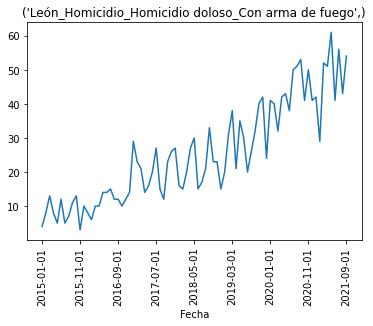

In [57]:
titu = delitos.columns[1764]
delitos.iloc[:,1764][:-3].plot(rot=90, title=titu)

## Análisis de las series de tiempo

In [58]:
delitos = pd.read_csv("tabla_completa.csv", index_col=0) 
delitos

,"('Abasolo_Homicidio_Homicidio doloso_Con arma de fuego',)","('Abasolo_Homicidio_Homicidio doloso_Con arma blanca',)","('Abasolo_Homicidio_Homicidio doloso_Con otro elemento',)","('Abasolo_Homicidio_Homicidio doloso_No especificado',)","('Abasolo_Homicidio_Homicidio culposo_Con arma de fuego',)","('Abasolo_Homicidio_Homicidio culposo_Con arma blanca',)","('Abasolo_Homicidio_Homicidio culposo_En accidente de tránsito',)","('Abasolo_Homicidio_Homicidio culposo_Con otro elemento',)","('Abasolo_Homicidio_Homicidio culposo_No especificado',)","('Abasolo_Lesiones_Lesiones dolosas_Con arma de fuego',)",...,"('Yuriria_Narcomenudeo_Narcomenudeo_Narcomenudeo',)","('Yuriria_Amenazas_Amenazas_Amenazas',)","('Yuriria_Allanamiento de morada_Allanamiento de morada_Allanamiento de morada',)","('Yuriria_Evasión de presos_Evasión de presos_Evasión de presos',)","('Yuriria_Falsedad_Falsedad_Falsedad',)","('Yuriria_Falsificación_Falsificación_Falsificación',)","('Yuriria_Contra el medio ambiente_Contra el medio ambiente_Contra el medio ambiente',)","('Yuriria_Delitos cometidos por servidores públicos_Delitos cometidos por servidores públicos_Delitos cometidos por servidores públicos',)","('Yuriria_Electorales_Electorales_Electorales',)","('Yuriria_Otros delitos del Fuero Común_Otros delitos del Fuero Común_Otros delitos del Fuero Común',)"
Fecha,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2015-02-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
2015-03-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2015-04-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
2015-05-01,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
2021-09-01,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0
2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


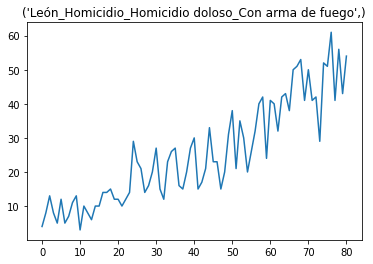

In [21]:
c = 1765
s = delitos.iloc[:,c][:-3]
plt.plot(s)
plt.title(delitos.columns[c])
plt.show()

In [22]:
todos = delitos.iloc[:,1][:-3]
todos

0     0.0
1     0.0
2     1.0
3     0.0
4     1.0
     ... 
76    1.0
77    1.0
78    0.0
79    1.0
80    0.0
Name: ('Abasolo_Homicidio_Homicidio doloso_Con arma de fuego',), Length: 81, dtype: float64

ACF: la función de autocorrelación

La función de autocorrelación es una herramienta que ayuda a identificar si existe autocorrelación en su serie temporal.

In [64]:
from statsmodels.graphics.tsaplots import plot_acf

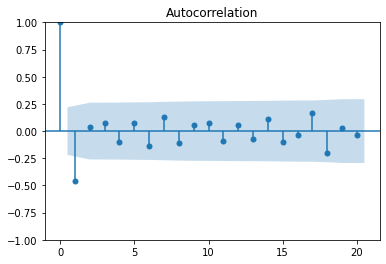

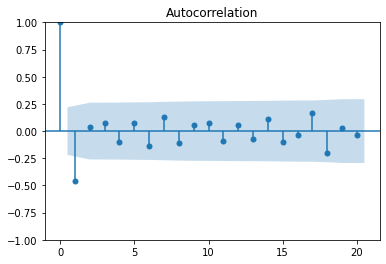

In [65]:
plot_acf(d_series)

PACF: la función de autocorrelación

El PACF es una alternativa al ACF. En lugar de dar las autocorrelaciones, te da la autocorrelación parcial. Esta autocorrelación se llama parcial, porque con cada paso hacia atrás en el pasado, solo se enumera la autocorrelación adicional. Esto es diferente del ACF, ya que el ACF contiene correlaciones duplicadas cuando la variabilidad puede explicarse por múltiples puntos en el tiempo.

Por ejemplo, si el valor de hoy es el mismo que el valor de ayer, pero también el mismo que el de anteayer, el ACF mostraría dos pasos altamente correlacionados. El PACF solo mostraría ayer y eliminaría anteayer.

/home/jupyter-achacon/.local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


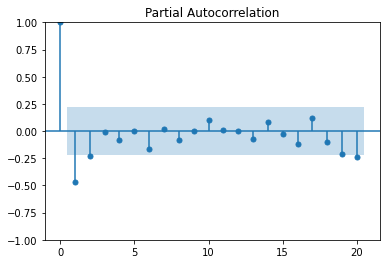

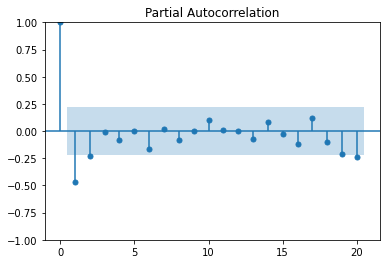

In [66]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(d_series)